In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

**Load Data**

In [4]:
df=pd.read_csv('/content/drive/MyDrive/machine Learning datasets/MACHINE LEARMIMG DATASETS/apple_5yr_one.csv')

In [5]:
df.head()

,Date,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2020-06-04,78.32931518554688,79.1312690763083,77.95506657558614,78.83236263047952,87560400
2,2020-06-05,80.56021881103516,80.62097312386399,78.55046881252456,78.57962969607472,137250400
3,2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
4,2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400


**Explore Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1255 non-null   object
 1   Close   1256 non-null   object
 2   High    1256 non-null   object
 3   Low     1256 non-null   object
 4   Open    1256 non-null   object
 5   Volume  1256 non-null   object
dtypes: object(6)
memory usage: 59.0+ KB


**Covert Date column to datetime**

In [7]:
df['Date']=pd.to_datetime(df['Date'])

**Convert Numeric columns from object to float**

In [8]:
cols_to_convert = ['Close','High','Low', 'Open', 'Volume']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1255 non-null   datetime64[ns]
 1   Close   1255 non-null   float64       
 2   High    1255 non-null   float64       
 3   Low     1255 non-null   float64       
 4   Open    1255 non-null   float64       
 5   Volume  1255 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 59.0 KB


**We can analyse that all above is being convert to its oringal formate**

In [10]:
df.head()

,Date,Close,High,Low,Open,Volume
0,NaT,NaN,NaN,NaN,NaN,NaN
1,2020-06-04,78.329315,79.131269,77.955067,78.832363,87560400.0
2,2020-06-05,80.560219,80.620973,78.550469,78.579630,137250400.0
3,2020-06-08,81.036537,81.070563,79.544415,80.256454,95654400.0
4,2020-06-09,83.595505,83.989192,80.684163,80.715756,147712400.0


**Sorting by date**

In [11]:
df.sort_values  (by='Date',inplace=True)

**Handling Missing Values**

In [12]:
df.isnull().sum()

,0
Date,1
Close,1
High,1
Low,1
Open,1
Volume,1


**Drop rows with NaN**

In [13]:
df.dropna(inplace=True)

**Check Duplicates**

In [14]:
df.duplicated().sum()

0

 **Financial Metrics
Dialy Return%**

In [15]:
df['Daily_Return'] = df['Close'].pct_change()

**Absolute change**

In [16]:
df['Volatility'] = df['High'] - df['Low']


 **Moving Averages
10-day moving average**

In [17]:
df['MA_10'] = df['Close'].rolling(10).mean()


**50-day moving average**

In [18]:
df['MA_50'] = df['Close'].rolling(50).mean()


**Visualization**

**Plot Close Price**

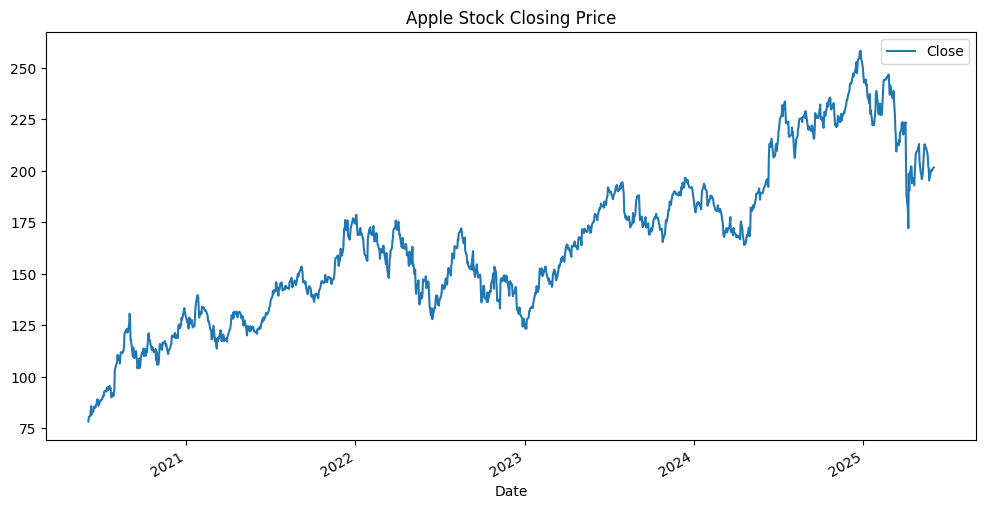

In [22]:
df.plot(x = 'Date', y = 'Close', title = 'Apple Stock Closing Price', figsize=(12,6))
plt.show()


**Moving Average plot**

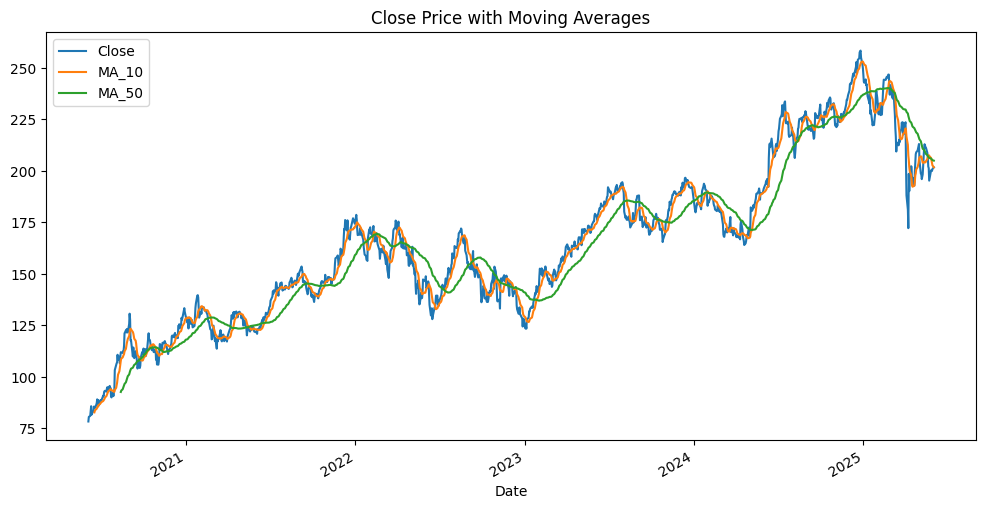

In [23]:
df[['Date', 'Close', 'MA_10', 'MA_50']].set_index('Date').plot(figsize=(12,6))
plt.title('Close Price with Moving Averages')
plt.show()


**Daily Return Plot**

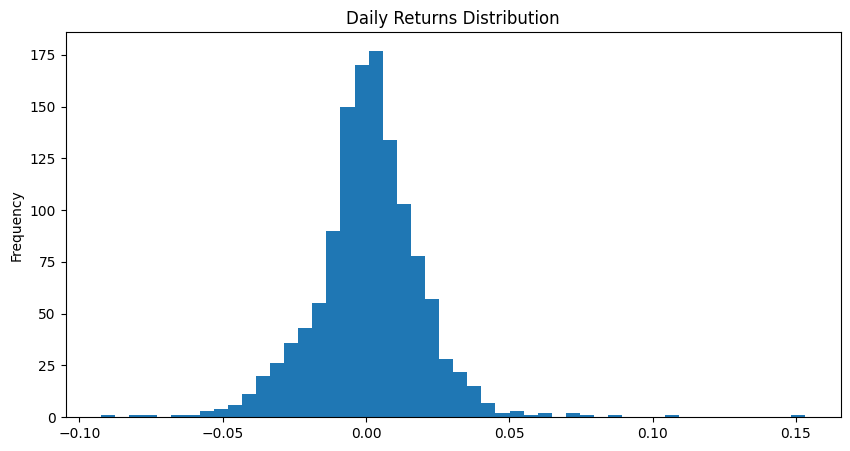

In [25]:
df['Daily_Return'].plot(kind='hist', bins = 50, figsize = (10,5), title = 'Daily Returns Distribution')
plt.show()

**Cumulative Return**

In [30]:
df['Daily_Return'] = df['Close'].pct_change()
df['Cumulative Return'] = (1 + df['Daily_Return']).cumprod() - 1

In [31]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Date'], y = df['Cumulative Return'], mode = 'lines', name = 'Cumulative Return', line = dict(color = 'green'), yaxis = 'y2'))


**Volatity over time (Rolling STD)**

In [33]:
df['Rolling_STD_20'] = df['Daily_Return'].rolling(window=20).std()

In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = df['Date'],
    y = df['Rolling_STD_20'],
    mode = 'lines',
    name = 'Rolling STD (20 DAYS)',
    line = dict(color = 'orange')

))

fig.show()

**Layout setting with dual y-axis**

In [35]:
fig.update_layout(title = 'Cumulative Return and Rolling std (20)',
xaxis_title = 'Date',
yaxis = dict(title = 'Rolling std', titlefont = dict(color = 'orange'), tickfont = dict(color = 'orange')),
                  yaxis2 = dict(title = 'Cumulative Return', titlefont = dict(color = 'green'), tickfont = dict(color = 'green'), overlaying = 'y', side = 'right'),
                  template = 'plotly_dark',
                  height = 500
)


**Technical Indicator**
**RSI**

In [36]:
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = pd.Series(gain).rolling(window = 14).mean()
avg_loss = pd.Series(loss).rolling(window = 14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
df['RSI'] = rsi.values


**MACD**

In [38]:
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
macd = ema_12 - ema_26


**Moving Average**

In [39]:
for window in [10, 20, 50]:
    df[f'MA_{window}'] = df['Close'].rolling(window=window).mean()

**Drop NaNs**

In [40]:
df.dropna(inplace=True)


**Feature and Target**

In [41]:
features = ['Open', 'High', 'Low', 'Volume', 'Daily Return', 'Price Change', 'Volatility', 'MA_10', 'MA_50', 'RSI']
target = 'Close'

**Train-test split**

In [43]:
features = ['Open', 'High', 'Low', 'Volume', 'Daily_Return', 'Volatility', 'MA_10', 'MA_50', 'RSI'] # Corrected column name
target = 'Close'

x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, shuffle=False)

**Train XGBoost Model**

In [44]:
model = XGBRegressor(n_estimators = 100, learning_rate = 0.1)
model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Prediction**

In [45]:
predictions = model.predict(x_test)


**Evaluation**

In [46]:
mse = mean_squared_error(y_test, predictions)
print(f'XGBoost Mean Squared Error: {mse: .4f}')


XGBoost Mean Squared Error:  1004.6616


**Plot Actaul vs Predicted**

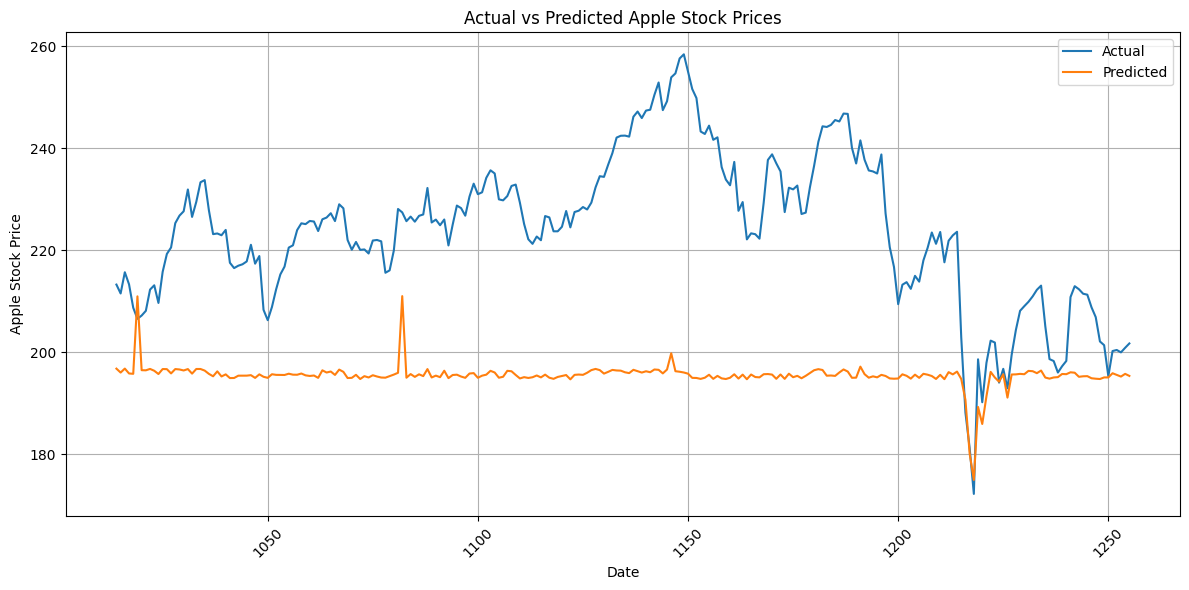

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.title('Actual vs Predicted Apple Stock Prices')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Save predictions**

In [48]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result_df.to_csv('apple_xgboost_predictions.csv', index=False)
print("Prediction saved to 'apple_xgboost_predictions.csv' ")

Prediction saved to 'apple_xgboost_predictions.csv' 
